Some examples with exponential distribution and linear regression. We showed that MLE for the expnential density is lambda_hat = n/sum(X). The estimated mean is 1/lambda_hat = sum(X)/n. Let's illustrate this

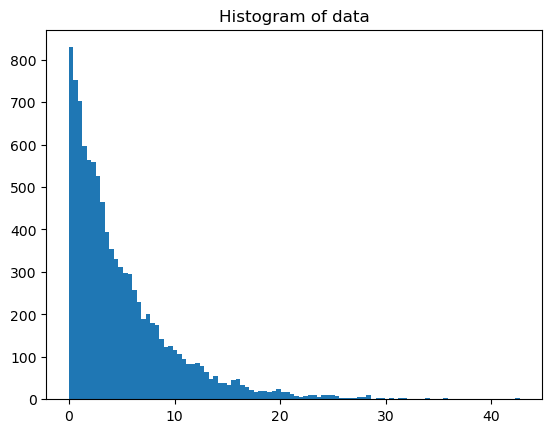

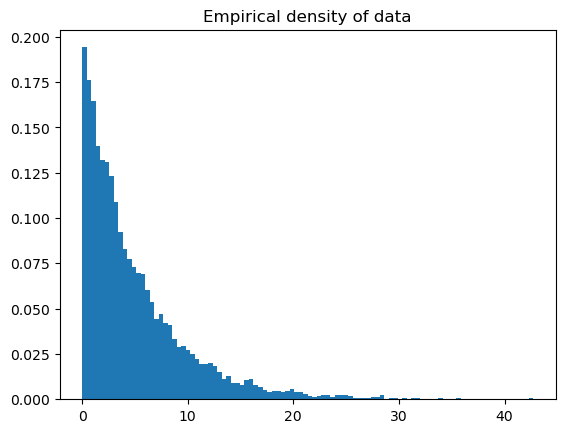

In [17]:

import numpy as np
import matplotlib.pyplot as plt

lam = 5
n = 10000

# generate some exponential random variables
exp_sample = np.random.exponential(scale = 5, size = n)

# plot histogram 
plt.hist(exp_sample, bins=100)
plt.title('Histogram of data')
plt.show() 

# plot densities
plt.hist(exp_sample, bins=100, density=True)
plt.title('Empirical density of data')
plt.show() 





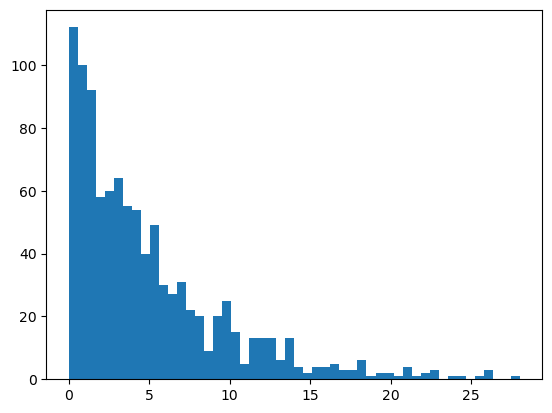

Next, estimate the mean of the sample and use it to approximate the density

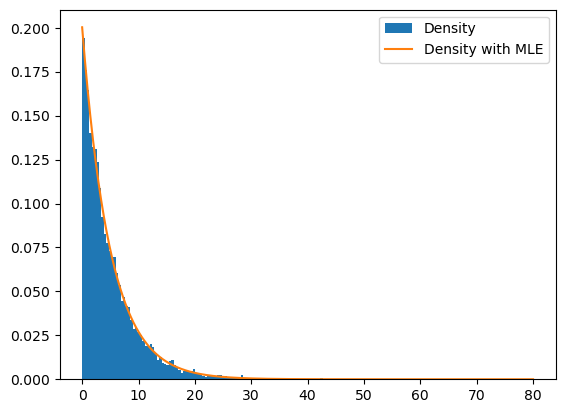

In [19]:
lam_hat = 1/np.mean(exp_sample)
x_plot = np.linspace(0,80,1000)
plt.hist(exp_sample, bins=100, density=True, label = 'Density')
plt.plot(x_plot, lam_hat*np.exp(-lam_hat*x_plot), label = 'Density with MLE')
plt.legend()
#find landa hat (good approximation)

Let's split the data into train and test test and predict the mean value using trining set. Then check the average error

In [4]:
n_train = int(len(exp_sample)/2)
train_set = exp_sample[:n_train] #first n
test_set = exp_sample[n_train:]  #the rest (indep)

pred = np.mean(train_set)
pred

5.113408067007016

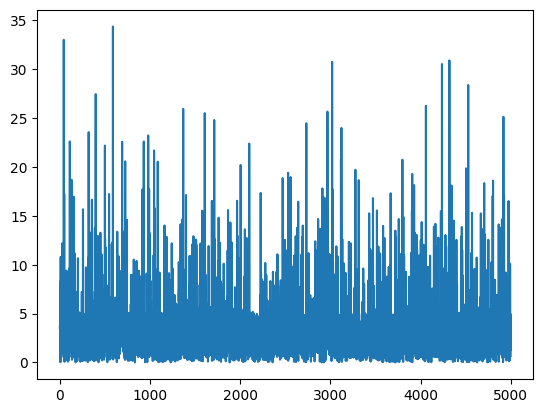

In [5]:
# average error
av_error = np.abs(pred-test_set)

plt.plot(av_error)
plt.show()

Linear regression with exponentially distributed response variable. In this case y_hat = ab^x, where a is intercept and b is the vector of regression coefficients

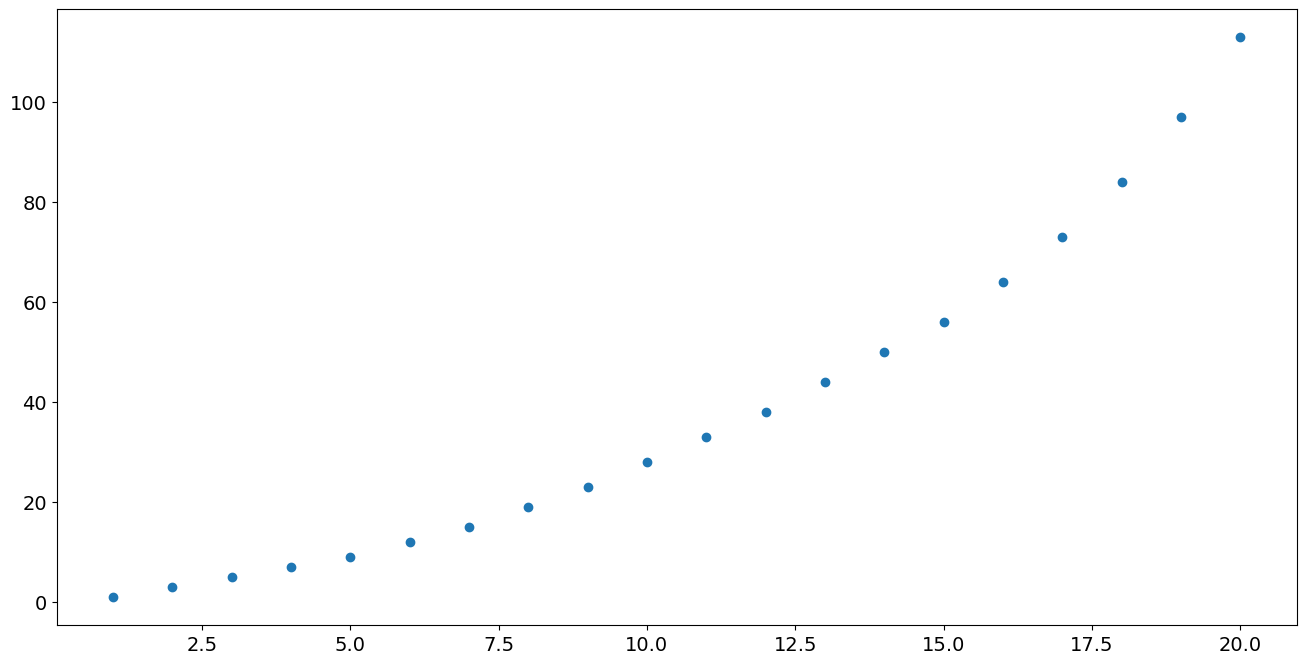

In [106]:
# Create some (exponentially) increasing data

x = np.arange(1, 21, 1)
y = np.array([1, 3, 5, 7, 9, 12, 15, 19, 23, 28,
              33, 38, 44, 50, 56, 64, 73, 84, 97, 113])

y.sort()
# visualize it
plt.scatter(x, y)
plt.show()


Now fit the exponential regression and find regression coefficients


In [107]:
#fit the model (deg parameter specifies the polynomial degree, but we are doing first-order polynomial)
fit = np.polyfit(x, np.log(y), deg = 1)

# note the order of the returned coefficients: highest power first
print(fit)

#order (the higher first)

[0.2041002  0.98165772]


Now the regression equation is ln(y) = 0.98165772 + 0.2041002^x . Hence, y = exp(0.98165772)*exp(0.2041002)^x. let's compute and visualize it

In [110]:
a = fit[1]
b = fit[0]

y_hat = np.exp(a)*np.exp(b)**x #np.exp(a)*np.exp(b)**x
y_hat


array([  3.27316667,   4.01428044,   4.92319796,   6.03791351,
         7.40502411,   9.08167729,  11.13796002,  13.6598284 ,
        16.75270082,  20.5458646 ,  25.19788043,  30.90321047,
        37.90034722,  46.48178288,  57.00623605,  69.91364674,
        85.74356666, 105.15771335, 128.96763114, 158.16861504])

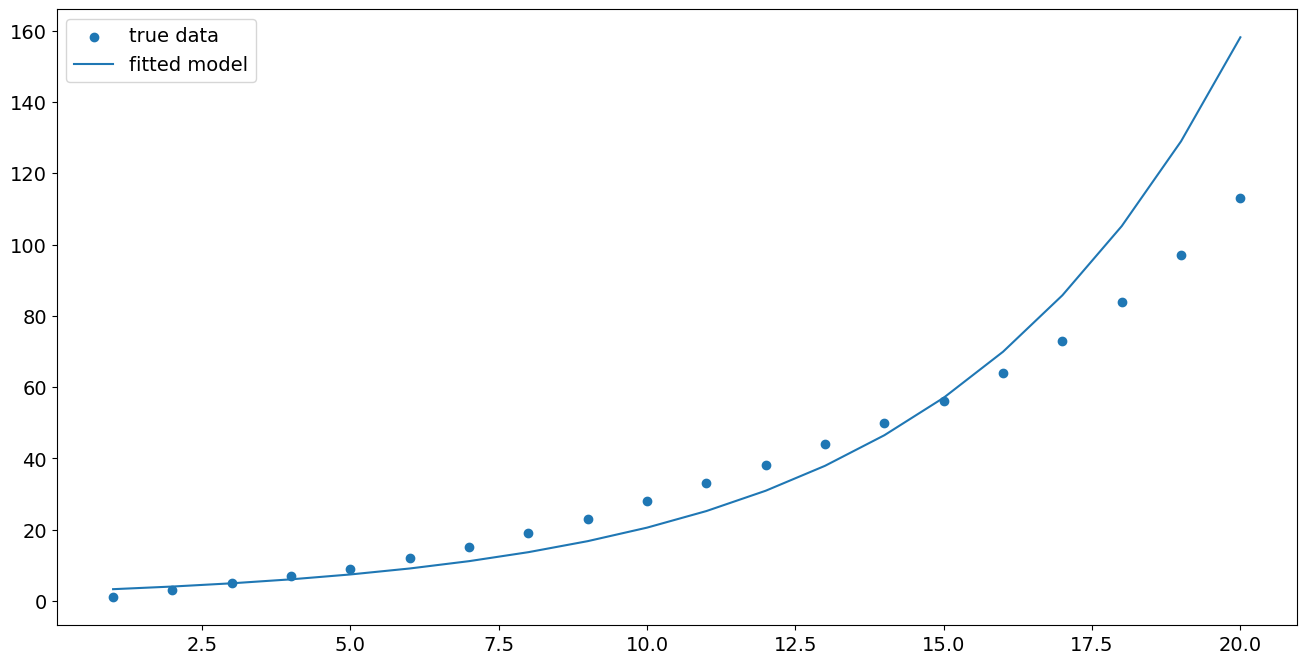

In [111]:
plt.scatter(x, y, label = 'true data')
plt.plot(x, y_hat, label = 'fitted model')
plt.legend()
plt.show()

In [81]:
x[11]
y_hat[11]

30.90321047104066

Generalised linear models (GLM) examples (Binomial)

In [17]:
import numpy as np
# import statsmodels packages, you would probably need to install it first! 
import statsmodels.api as sm
from scipy import stats
from matplotlib import pyplot as plt

plt.rc("figure", figsize=(16,8))
plt.rc("font", size=14)

In GLM there are some datasets we can use. Take star98 which contains 303 observations of students in California 

In [18]:
print(sm.datasets.star98.NOTE)

::

    Number of Observations - 303 (counties in California).

    Number of Variables - 13 and 8 interaction terms.

    Definition of variables names::

        NABOVE   - Total number of students above the national median for the
                   math section.
        NBELOW   - Total number of students below the national median for the
                   math section.
        LOWINC   - Percentage of low income students
        PERASIAN - Percentage of Asian student
        PERBLACK - Percentage of black students
        PERHISP  - Percentage of Hispanic students
        PERMINTE - Percentage of minority teachers
        AVYRSEXP - Sum of teachers' years in educational service divided by the
                number of teachers.
        AVSALK   - Total salary budget including benefits divided by the number
                   of full-time teachers (in thousands)
        PERSPENK - Per-pupil spending (in thousands)
        PTRATIO  - Pupil-teacher ratio.
        PCTAF    - Percenta

In [30]:
# load the data
data = sm.datasets.star98.load()
# not the usage: exog = dependent variables, endog = independent variable!
data.exog.head()
data.endog.head()

# BINOMIAL CLASSIFICATION PROBLEM: o es nabove o es nbellow

,NABOVE,NBELOW
0,452.0,355.0
1,144.0,40.0
2,337.0,234.0
3,395.0,178.0
4,8.0,57.0


In [80]:
# fit Binomial regression to the data (note: we are solving classification problem, hence use logistic regression)
glm_binom = sm.GLM(data.endog, data.exog, family=sm.families.Binomial())
res = glm_binom.fit()
print(res.summary()) #(Iteratively reweighted least squares)

# probability of succes en el caso de binomial (above: success)


                  Generalized Linear Model Regression Results                   
Dep. Variable:     ['NABOVE', 'NBELOW']   No. Observations:                  303
Model:                              GLM   Df Residuals:                      283
Model Family:                  Binomial   Df Model:                           19
Link Function:                    Logit   Scale:                          1.0000
Method:                            IRLS   Log-Likelihood:                -3000.5
Date:                  Fri, 11 Oct 2024   Deviance:                       4082.4
Time:                          12:37:37   Pearson chi2:                 4.05e+03
No. Iterations:                       5   Pseudo R-squ. (CS):              1.000
Covariance Type:              nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
LOWINC

In [88]:
# number of observation
res.nobs
res.mu

array([0.5854989 , 0.75311617, 0.50114075, 0.686423  , 0.3254407 ,
       0.686351  , 0.3328514 , 0.6568143 , 0.49932248, 0.50938476,
       0.23853108, 0.86322957, 0.46448915, 0.44203898, 0.66932405,
       0.73929991, 0.52033839, 0.43176856, 0.56410012, 0.59338801,
       0.34583156, 0.56126923, 0.49918087, 0.35632081, 0.20228968,
       0.17956955, 0.44927018, 0.48008273, 0.59945908, 0.58865705,
       0.3625851 , 0.3328329 , 0.74304611, 0.50931187, 0.53682992,
       0.56152508, 0.6012882 , 0.29144785, 0.29392836, 0.32180946,
       0.48408298, 0.23579667, 0.10985299, 0.156223  , 0.27801411,
       0.22599614, 0.18210986, 0.32273295, 0.22584067, 0.15699551,
       0.1525449 , 0.62018509, 0.2020261 , 0.51729314, 0.46762569,
       0.4171189 , 0.5971213 , 0.66108201, 0.27727755, 0.2353707 ,
       0.25271081, 0.23836628, 0.27814816, 0.3936563 , 0.27708665,
       0.61461857, 0.22623025, 0.41889539, 0.56507915, 0.35230049,
       0.46194706, 0.57382965, 0.21645818, 0.58381429, 0.17118

In [47]:
nobs = res.nobs

In [76]:
# Compute the true proportion of the students above the median
y = data.endog['NABOVE']/data.endog.sum(1)


In [43]:
# and the estimated proportion of the students above (actually we don't need to compute as the proportion is returned when we do fit)
y_hat = res.mu
y_hat

array([0.5854989 , 0.75311617, 0.50114075, 0.686423  , 0.3254407 ,
       0.686351  , 0.3328514 , 0.6568143 , 0.49932248, 0.50938476,
       0.23853108, 0.86322957, 0.46448915, 0.44203898, 0.66932405,
       0.73929991, 0.52033839, 0.43176856, 0.56410012, 0.59338801,
       0.34583156, 0.56126923, 0.49918087, 0.35632081, 0.20228968,
       0.17956955, 0.44927018, 0.48008273, 0.59945908, 0.58865705,
       0.3625851 , 0.3328329 , 0.74304611, 0.50931187, 0.53682992,
       0.56152508, 0.6012882 , 0.29144785, 0.29392836, 0.32180946,
       0.48408298, 0.23579667, 0.10985299, 0.156223  , 0.27801411,
       0.22599614, 0.18210986, 0.32273295, 0.22584067, 0.15699551,
       0.1525449 , 0.62018509, 0.2020261 , 0.51729314, 0.46762569,
       0.4171189 , 0.5971213 , 0.66108201, 0.27727755, 0.2353707 ,
       0.25271081, 0.23836628, 0.27814816, 0.3936563 , 0.27708665,
       0.61461857, 0.22623025, 0.41889539, 0.56507915, 0.35230049,
       0.46194706, 0.57382965, 0.21645818, 0.58381429, 0.17118

Plot the actual proportion of the above students vs the estimated proportion

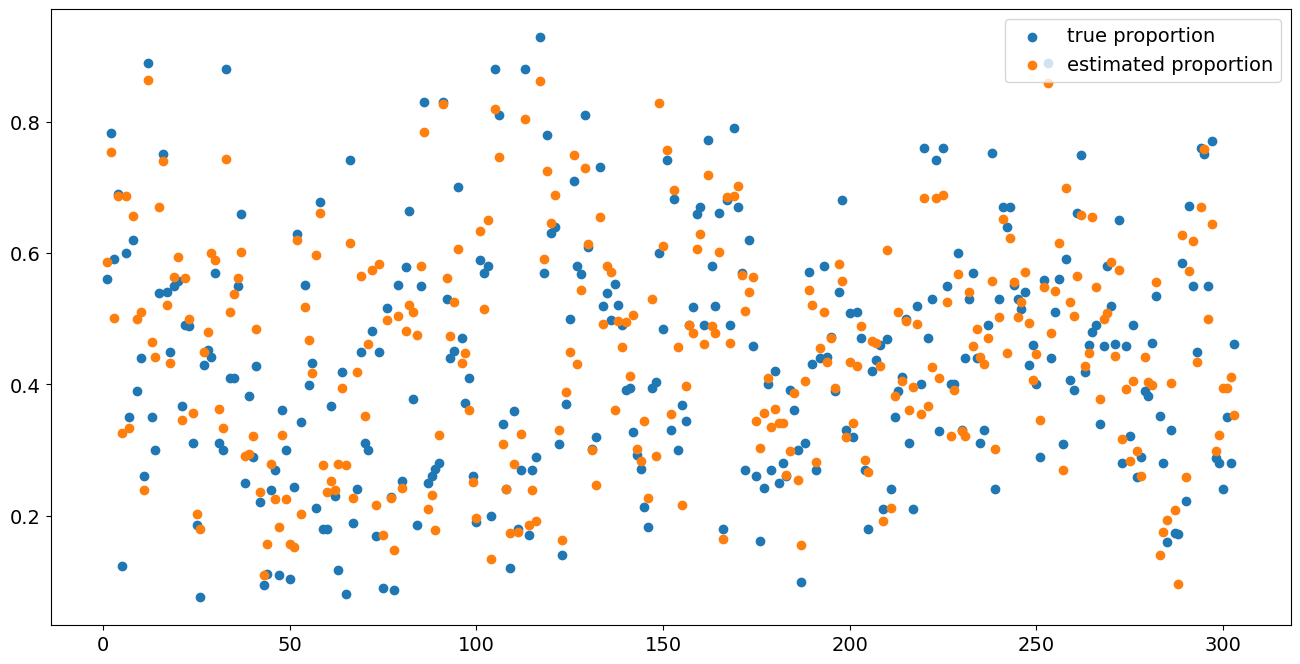

In [75]:
sm.add_constant(y_hat)
y
x = np.linspace(1, len(y), len(y))
plt.scatter(x, y, label = 'true proportion')
plt.scatter(x, y_hat, label = 'estimated proportion')
plt.legend(loc = 'best')


Text(0.5, 0, 'Fitted')

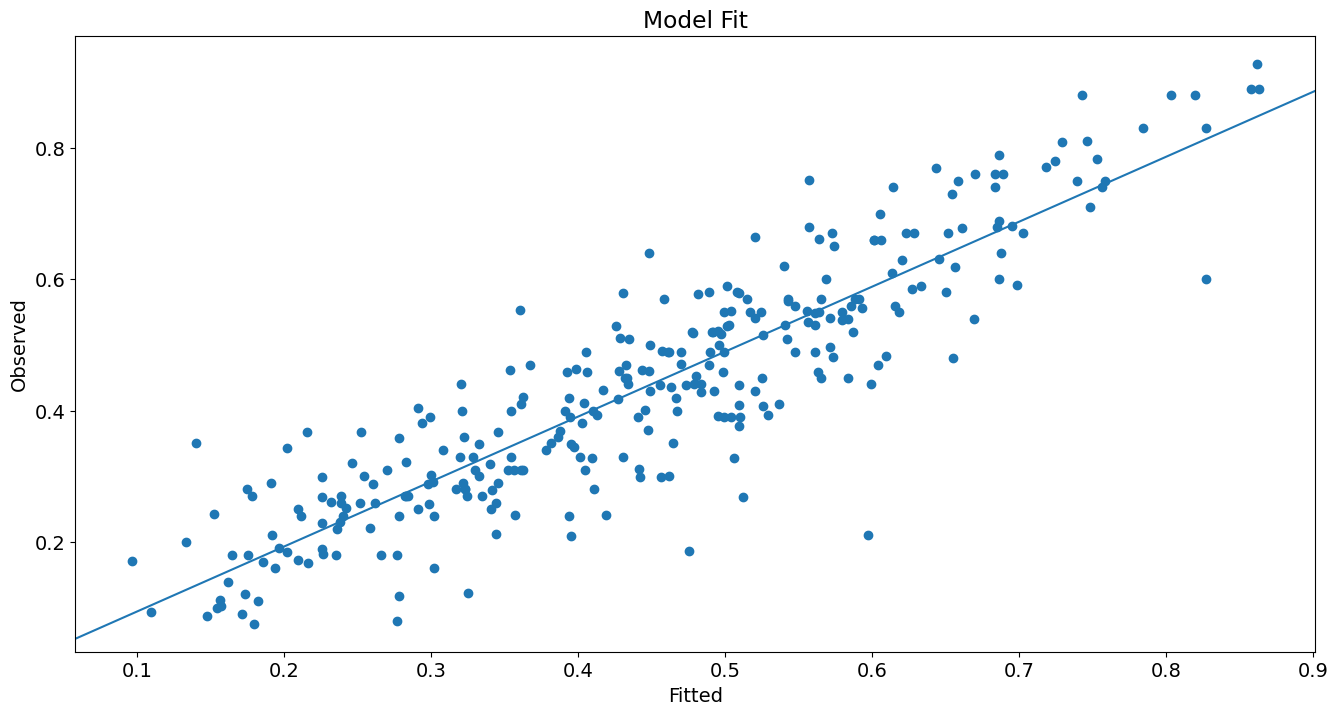

In [46]:
# now plot the results

from statsmodels.graphics.api import abline_plot

fig, ax = plt.subplots()
ax.scatter(y_hat, y)
# plot the linear regression line using OLS (ordinary least square) model from GLM
line_fit = sm.OLS(y, sm.add_constant(y_hat, prepend=True)).fit() 
abline_plot(model_results=line_fit, ax=ax)


ax.set_title('Model Fit')
ax.set_ylabel('Observed')
ax.set_xlabel('Fitted')

Can also try scikit-learn

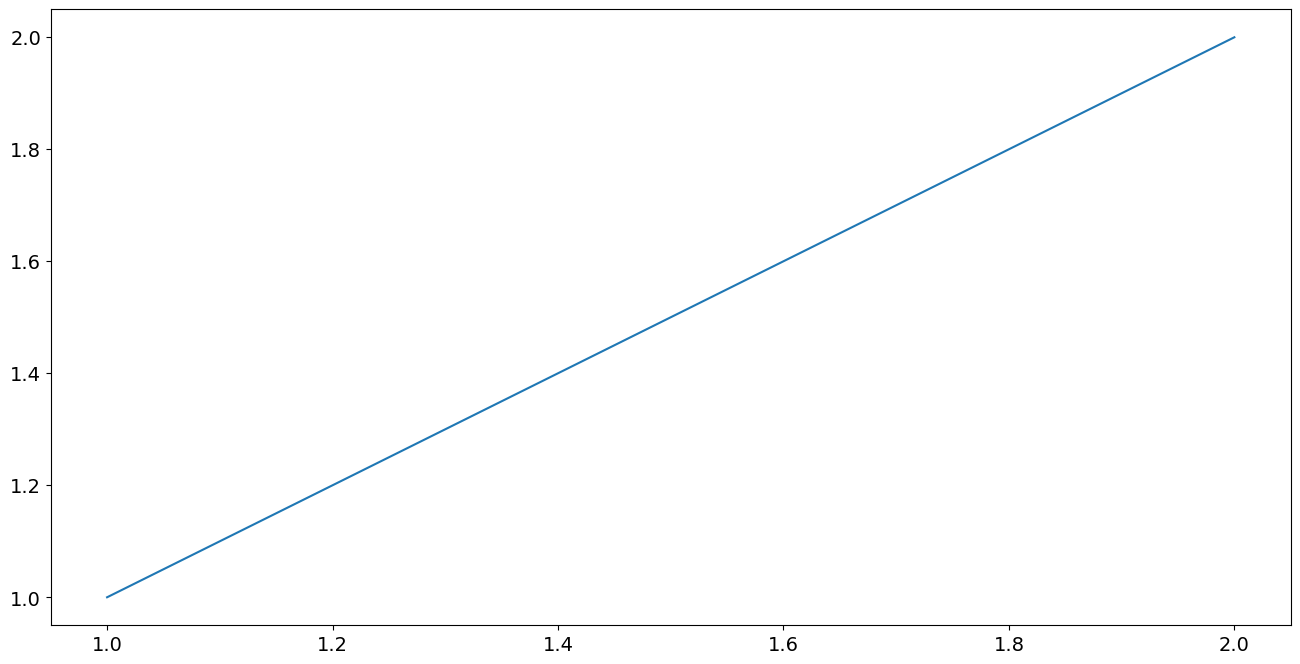

In [94]:
import numpy as np
from sklearn.linear_model import LinearRegression
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])

plt.plot(X[:, 0], X[:, 0]) 

In [96]:
y = np.dot(X, np.array([1, 2])) + 3
reg = LinearRegression().fit(X, y)
reg.score(X, y)
1.0
reg.coef_


array([1., 2.])

In [101]:
y_hat = reg.predict(np.array([[3, 5]]))
y_hat

array([16.])